In [32]:
import pandas as pd
from config import config
from imblearn.over_sampling import RandomOverSampler

In [33]:
# load the dataset
toxic_comments = config.input_file('toxic_comment.csv')
df = pd.read_csv(toxic_comments)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [34]:
# drop the id column
df.drop('id', axis=1, inplace=True)

<AxesSubplot:>

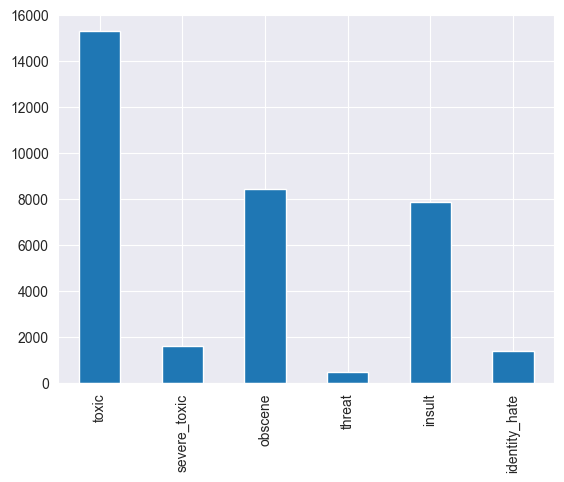

In [35]:
# plot the label distribution
label_columns = df.columns[1:]
df[label_columns].sum(axis=0).plot(kind='bar')

In [36]:
# create one hot encoding of the data labels
df['one_hot'] = df[label_columns].values.tolist()
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,one_hot
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"


In [37]:
# remove all the label columns and leave only the text and one_hot columns
df.drop(label_columns, axis=1, inplace=True)
df.head()

,comment_text,one_hot
0,Explanation\r\nWhy the edits made under my use...,"[0, 0, 0, 0, 0, 0]"
1,D'aww! He matches this background colour I'm s...,"[0, 0, 0, 0, 0, 0]"
2,"Hey man, I'm really not trying to edit war. It...","[0, 0, 0, 0, 0, 0]"
3,"""\r\nMore\r\nI can't make any real suggestions...","[0, 0, 0, 0, 0, 0]"
4,"You, sir, are my hero. Any chance you remember...","[0, 0, 0, 0, 0, 0]"


<AxesSubplot:>

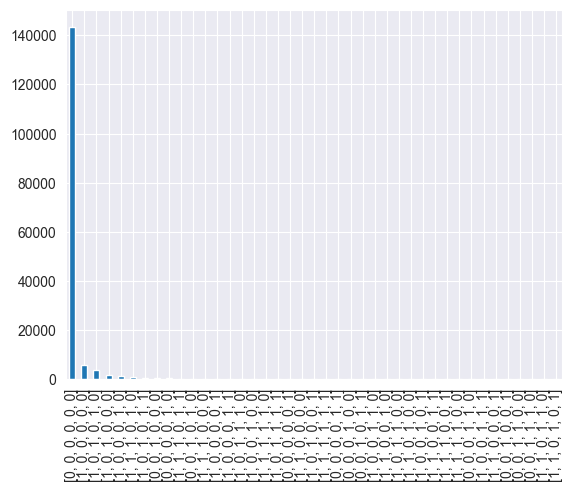

In [38]:
# plot the distribution of the one hot encoded labels
df['one_hot'].value_counts().plot(kind='bar')

In [39]:
# interpret the one hot encodings as a binary number and convert to decimal
df['one_hot'] = df['one_hot'].apply(lambda x: int(''.join(map(str, x)), 2))
df.head()

,comment_text,one_hot
0,Explanation\r\nWhy the edits made under my use...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\r\nMore\r\nI can't make any real suggestions...",0
4,"You, sir, are my hero. Any chance you remember...",0


<AxesSubplot:>

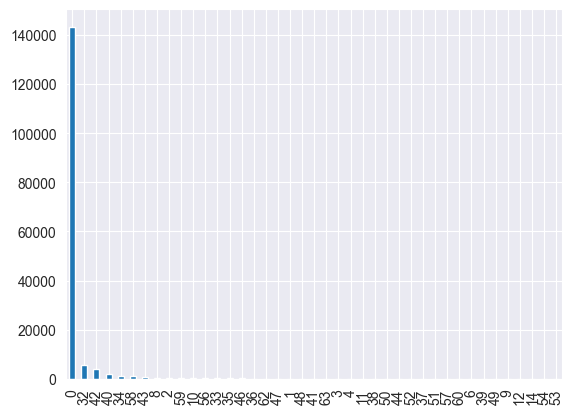

In [40]:
# plot the distribution of the decimal encoded labels
df['one_hot'].value_counts().plot(kind='bar')

In [41]:
# use oversampling to balance the dataset
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df['comment_text'].values.reshape(-1, 1), df['one_hot'].values.reshape(-1, 1))

<AxesSubplot:>

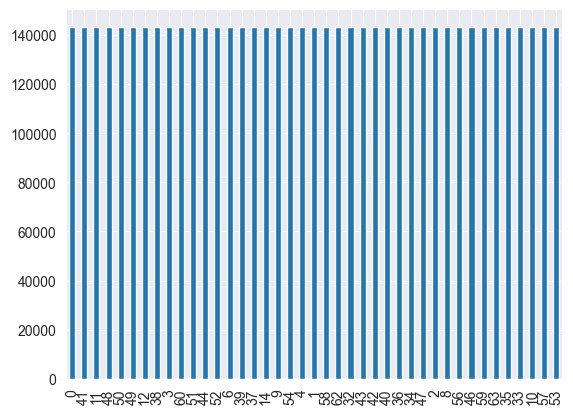

In [42]:
# plot the distribution of the oversampled labels
pd.Series(y_resampled.reshape(-1)).value_counts().plot(kind='bar')

In [43]:
# create a new dataframe with the oversampled data
df = pd.DataFrame({'comment_text': X_resampled.reshape(-1), 'one_hot': y_resampled.reshape(-1)})
df.head()

,comment_text,one_hot
0,Explanation\r\nWhy the edits made under my use...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\r\nMore\r\nI can't make any real suggestions...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [44]:
# convert the one hot encoding back to a list of labels
df['one_hot'] = df['one_hot'].apply(lambda x: list(map(int, list(bin(x)[2:].zfill(6)))))
df.head()

,comment_text,one_hot
0,Explanation\r\nWhy the edits made under my use...,"[0, 0, 0, 0, 0, 0]"
1,D'aww! He matches this background colour I'm s...,"[0, 0, 0, 0, 0, 0]"
2,"Hey man, I'm really not trying to edit war. It...","[0, 0, 0, 0, 0, 0]"
3,"""\r\nMore\r\nI can't make any real suggestions...","[0, 0, 0, 0, 0, 0]"
4,"You, sir, are my hero. Any chance you remember...","[0, 0, 0, 0, 0, 0]"


In [45]:
# create the intial label columns from the one hot encoding
for i in range(6):
    df[label_columns[i]] = df['one_hot'].apply(lambda x: x[i])

In [46]:
# drop the one hot column
df.drop('one_hot', axis=1, inplace=True)
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [51]:
# save the balanced dataset to a csv file in the data/input folder
path = "../data/input/"
df.to_csv(path+'toxic_comment_balanced.csv', index=False)